# STEP 1-3

Below you see a list of so-called libraries. Python does not know a lot by itself, by downloading the libaries, python is able to do all sorts of things such as making a plot.

In [1]:
#Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import VarianceThreshold
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10,5)})


#importing dataset
wine = pd.read_csv("winequality-red_2.csv") 

# STEP 4: Data exploration 

Look through the table and explore the variables. Remember that you can look at the table with the `.head()` function. If you use `.head(n=20)` you can see the first 20 variables of our dataset. 

,ID,age,gender,price,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,star_rating,quality
0,628,28,0,11.983122,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2.5,5
1,231,65,0,11.708629,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2.5,5
2,283,39,0,12.391544,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2.5,5
3,488,46,0,14.003530,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3.0,6
4,665,66,0,9.394715,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2.5,5
5,710,67,0,NaN,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,2.5,5
6,148,45,0,NaN,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,2.5,5
7,538,80,0,NaN,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,3.5,7
8,10,82,0,NaN,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,3.5,7
9,306,50,0,NaN,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,2.5,5


Look at the distribution of the dataset with `.describe()`. The function shows the several summarizing values of the column, such as the mean of the column, the standard deviation (which you might know from statistics), the smallest value of the column (min) and the largest value (max). Pay attention to anything that stands out! 

,ID,age,gender,price,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,star_rating,quality
count,1599.000000,1599.000000,1599.0,1549.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,445.415885,52.044403,0.0,13.679707,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,2.818011,5.636023
std,259.162535,18.535050,0.0,1.827324,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.403785,0.807569
min,3.000000,20.000000,0.0,8.319083,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,1.500000,3.000000
25%,219.000000,36.000000,0.0,12.365515,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,2.500000,5.000000
50%,446.000000,53.000000,0.0,13.574114,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,3.000000,6.000000
75%,665.000000,68.000000,0.0,14.891015,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,3.000000,6.000000
max,899.000000,84.000000,0.0,19.559566,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,4.000000,8.000000


Look true the table of `wine` and fill out below the variables below. 

In [96]:
number_of_variables = 
mean_quality = 
minimum_alchol = 
maximum_pH = 

SyntaxError: invalid syntax (<ipython-input-96-28170a566b7c>, line 1)

We want to predict the quality of wine, therefore `"quality"` is our target column. Before we are going to do any modelling, we first want to see the relationship between quality and the other columns. Are there any visible patterns? Or might there be no relationship between what we want to predict and the available data?

Let's explore the relationship between our target variable and the features. Below we plotted a barplot with quality and alcohol with the function `sns.barplot()`. `x` indicates the variable on the x-axis, `y` the y-axis. Change the `y` to other column names in order to explore the relationship with other features, e.g. `y = 'fixed acidity'` or `citric acidity`.


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


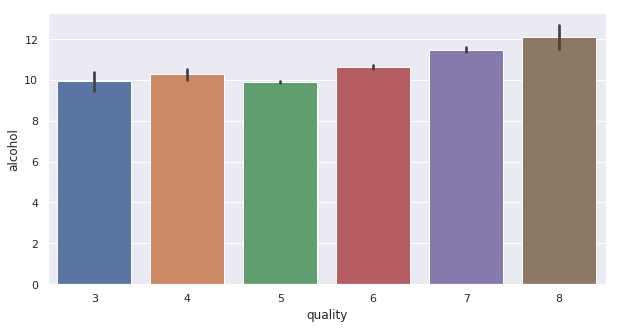

In [6]:
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

# STEP 5: Feature engineering
## 5.1 Dealing with missing data

In the data exploration you could notice several missing values. Let's get an overview. The function `.isna()` stands for is not available. It returns all empty the empty cells. `.sum()` counts all these empty cells per column. 

In [8]:
wine.isna().sum()

ID                       0
age                      0
gender                   0
price                   50
fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
star_rating              0
quality                  0
dtype: int64

The missing values are present in the price column. We want to get rid of the not available values, because the model we will implement later is not able to deal with them. There are several ways to approach this. However, replacing the missing values by zeros is often not a good idea. Below, we demonstrate why. First we plot the distribution of the price column, without removing the not available values. We do this by using the `.hist()` function

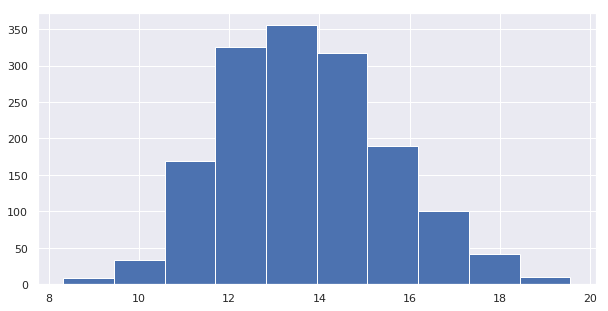

In [9]:
wine["price"].hist()

Now, we'll make the mistake of replacing not available values by zeros. We will do this in a copy of our data set, so it does not store in our original dataset. We call it `wine_wrong`. 

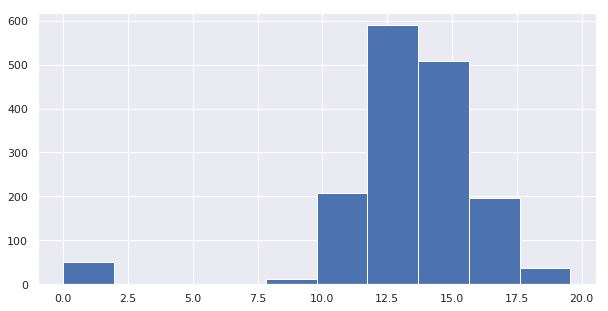

In [10]:
wine_wrong = wine

wine_wrong = wine_wrong.fillna(0)

wine_wrong["price"].hist()

As you can see, our distribution changed drastically. This will disturb the data and can potentially lead to the wrong conclusions. Other ways to deal with missing data simply dropping rows with not available data. However this leads to loss of valuable information. This is definitely not a good idea when there are many missing values. You will end with very little data left. 

Another approach is replacing not available values by the mean of the column. We will do this for now. `.fillna()` stands for fill not availables. It replaces the not available values by the number we put between the brackets. `.mean()` returns the column mean. 

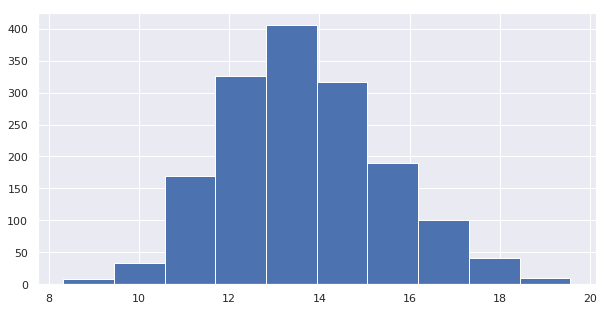

In [11]:
wine["price"] = wine["price"].fillna(wine["price"].mean())

wine["price"].hist()

#### Optional reading material: 
You can see that that the shape of the distribution stays relatively similar compared to the distribution with missing values. However, it should be noted that it could also lead to trouble, as it biases the data towards the mean. This mean might not apply to the real life situation. Therefore it may lead to inaccurate model predictions. Other statistical approaches are available to deal with missing data, but will keep it for now with the mean replacement! 

## 5.2 Making quality binary: good and bad quality

We are interested in whether people see the wine as good or bad quality. This is a classification problem. We want to divide the data into two bins: one with good wines and one with bad wines. We will use the quality grade to divide the data. Lower than a 5.5 is bad quality, higher is considered good quality. This boundary is arbitrary. If you want to set a higher standard, replace the value "5.5" of the variable `bins`. 

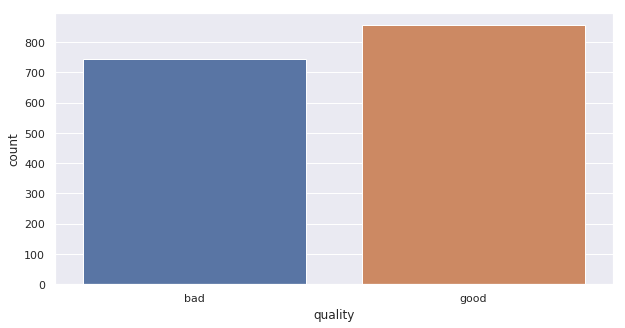

In [12]:
#Dividing wine as good and bad by giving the limit for the quality
bins = (1, 5.5, 10)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

sns.countplot(wine['quality'])

Our modelling algorithm only understand numbers, no words. Therefore we need to replace the labels "good" and "bad" by numbers. We set bad to 0 and good to 1. Therefore we use an inbuilt functionality of one of our libraries called `LabelEncoder()`. 

In [13]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

# STEP 6: Feature selection

## 6.1 Removing features by common sense 

Look again through the data table. Some features might be unnecessary. With common sense we can say that they do not influence the quality of wine. These colomns should be removed, as they provide no predictive information of quality for our model. Write down the column names below, with the following structure `["feature1", "feature2", "feature3"]`

In [14]:
unrelated_features = ["ID", "age", "gender"]  ### REMOVE BEFORE COURSE ##

#this function ensures that the unrelated features are dropped 
wine = wine.drop(columns = unrelated_features, axis=1)

## 6.2 Removing collinear features

The plot `sns.heatmap()` below shows whether the variables of the columns `wine.columns` correlate, e.g. whether price corresponds with alcohol. Lighter colours show a positive correlation, e.g. higher alcohol content leads to higher price. Dark colours show a negative correlation, e.g. higher alcohol content leads to a lower price. Purple means no correlation, e.g. price and alcohol are unrelated. The values of the correlation are displayed by setting `annot` (annotation) to `True`. 

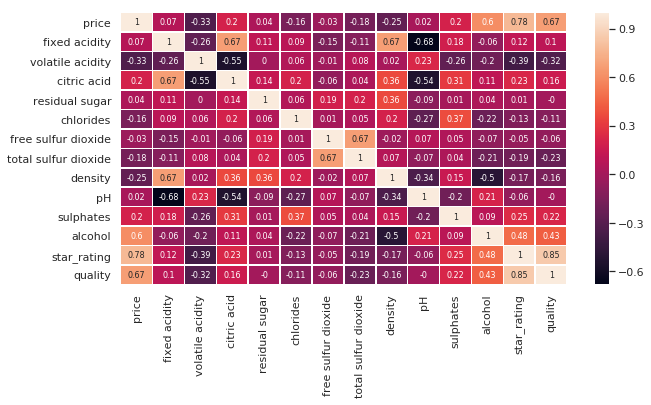

In [15]:
# calculate the correlation between each column
corr = wine.corr()

#round the correlation on with 2 numbers behind the comma
corr = round(corr, 2)

# plot the heatmap
sns.heatmap(corr, xticklabels=wine.columns, yticklabels=wine.columns, annot=True, annot_kws = {"size" : 8 }, linewidths=.5)

If our features are highly correlated (> 0.95 or < -0.95), the information is redundant and therefore can be removed. If our features are very highly correlated (> 0.99 or < -0.99) with our target variable (quality), we have a bigger problem. Our model will allready know the anwers, because the features contain a variable that corresponds almost exactly with our target variable. We call this data leakage. If this is the case, we need to remove this variable. 

Based on the correlation matrix and what we learned during the introduction. Which column is best to remove? 

In [16]:
correlated_features = 

wine = wine.drop(columns = correlated_features, axis=1)

## 6.3 Low variance filter 

Consider a variable in our dataset where all the observations have the same value, e.g. alcohol is always 15%. If we use this variable, do you think it can adds informations? The answer is no, because this variable has zero variance. A change in alcohol would not lead to a change in quality, because alcohol is a constant of 15%. To detect this, python can calculate the variance of each variable we are given. The function `.var()` shows the variance of each of the columns in the dataset.

In [17]:
wine.var()

price                      3.234635
fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.248951
dtype: float64

We set a threshold, a point where we distinguish between high and low variance. We want to set the threshold close to zero, which means that the variable stays almost the same. Higher thresholds can be set, however, you will loose a lot of data that might have valuable information about your target variable.

In [18]:
threshold = 0.005

With the use of the `>`-statement you can check if the variance of the columns is higher that the threshold. 

In [19]:
wine.var() > threshold

price                    True
fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar           True
chlorides               False
free sulfur dioxide      True
total sulfur dioxide     True
density                 False
pH                       True
sulphates                True
alcohol                  True
quality                  True
dtype: bool

Plug this statement into the `.loc[]` function below. It will return our dataset, with only the columns that have a variance higher than our threshold. In other words it will return only the columns that are `True` following the statement. 

In [20]:
#return all columns with variance higher than the threshold
wine = wine.loc[:, wine.var() > threshold]   ### REMOVE BEFORE COURSE ##

#wine = wine.loc[:, "put the statement here"] 

# STEP 7: Modelling

## 7.1 Target and feature setting

Another preperation for the modelling is seperating your target and features and storing them to a `X` and `y` variable. Our target `y` is the binary value quality. With a 0 for bad quality and a 1 for good quality wine. 

In [21]:
y = wine['quality']

y.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

Review the final features `X` for the model. 

In [22]:
X = wine.drop(['quality'], axis = 1)

X.head()

,price,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,11.983122,7.4,0.70,0.00,1.9,11.0,34.0,3.51,0.56,9.4
1,11.708629,7.8,0.88,0.00,2.6,25.0,67.0,3.20,0.68,9.8
2,12.391544,7.8,0.76,0.04,2.3,15.0,54.0,3.26,0.65,9.8
3,14.003530,11.2,0.28,0.56,1.9,17.0,60.0,3.16,0.58,9.8
4,9.394715,7.4,0.70,0.00,1.9,11.0,34.0,3.51,0.56,9.4


## 7.2 Splitting test and train data

In order to assess your model’s performance later, you will need to divide the data set into two parts: a training set and a test set.

The first is used to train the model, while the second is used to evaluate our trained model. In practice, the division of your data set into a test and a training sets is disjoint: the most common splitting choice is to take 70% of your original data set as the training set, while the 30% that remains will compose the test set.


The function `train_test_split()` divides our feature data (`X`) in two parts and our target data (`y`) in two parts. 
'test_size' is set to 0.3, which means that 30% of our data go to the test set. You can change `test_size` to a different number to see the effect on the results later. `random_state` ensures that it will always return the same split of test and train set. We set it to 42, but it can be any number.  


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## 7.3 Algorithms

Finally, it is time for modelling! Usually the collection, exploration and preperation of the data, requires much more time then the modelling, as data is rarely perfect. We will be testing three different models: a decision tree, random forest and logistic regression. Each model will be evaluated for its performance. 



### Decision Tree

First we define our model. We use `tree.DecisionTreeClassifier()`. Next we are going to use our training data `X_train` and `y_train` to fit our model parameters with `.fit()`. The training of the model parameters is not visible! A lot goes on in the background! 

In [24]:
#Defining the model
dtc = tree.DecisionTreeClassifier()

#fit the model to our training data
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Next, we are making predictions of our test set, based on our fitted model. Remember `dtc` is the value where our decision tree model is specified. We use the `.predict()` function and apply this to make predictions about our test set `X_test`.

In [25]:
#Making prediction on the test set 
pred_dtc = dtc.predict(X_test)

We will take the same steps for our 2 other models: random forest and logistic regression. 

### Random Forest

In [26]:
#Defining the model
rfc = RandomForestClassifier(n_estimators=200)

#fit the model to our training data
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
#Making prediction on the test set 
pred_rfc = rfc.predict(X_test)

### Logistic Regression

In [28]:
#Defining the model
lrg = LogisticRegression()

#fit the model to our training data
lrg.fit(X_train, y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
#Making prediction on the test set 
pred_lrg = lrg.predict(X_test)

# STEP 8: Evaluation

We compare our three models, to select the best performing one. We look at the learning-curve to inspect the performance. Don't worry too much the code, but take your time to inspect the plot! 

## 8.1 Learning curve

In [32]:
def plot_learning_curve(dtc, rfc, lrg, X, y):
   # Create CV training and test scores for various training set sizes
        train_sizes_dtc, train_scores_dtc, test_scores_dtc = learning_curve(dtc, 
                                                                X, 
                                                                y,
                                                                # Number of folds in cross-validation
                                                                cv=10,
                                                                # Evaluation metric
                                                                scoring='accuracy',
                                                                # Use all computer cores
                                                                n_jobs=-1, 
                                                                # 50 different sizes of the training set
                                                                train_sizes=np.linspace(0.01, 1.0, 50),
                                                                shuffle=True)
        
        train_sizes_rfc, train_scores_rfc, test_scores_rfc = learning_curve(rfc, 
                                                                X, 
                                                                y,
                                                                # Number of folds in cross-validation
                                                                cv=10,
                                                                # Evaluation metric
                                                                scoring='accuracy',
                                                                # Use all computer cores
                                                                n_jobs=-1, 
                                                                # 50 different sizes of the training set
                                                                train_sizes=np.linspace(0.01, 1.0, 50),
                                                                shuffle=True)
        
        train_sizes_lrg, train_scores_lrg, test_scores_lrg = learning_curve(lrg, 
                                                                X, 
                                                                y,
                                                                # Number of folds in cross-validation
                                                                cv=10,
                                                                # Evaluation metric
                                                                scoring='accuracy',
                                                                # Use all computer cores
                                                                n_jobs=-1, 
                                                                # 50 different sizes of the training set
                                                                train_sizes=np.linspace(0.01, 1.0, 50),
                                                                shuffle=True)
        
        # Create means and standard deviations of test set scores
        test_mean_dtc = np.mean(test_scores_dtc, axis=1)
        test_mean_rfc = np.mean(test_scores_rfc, axis=1)
        test_mean_lrg = np.mean(test_scores_lrg, axis=1)
        
        # Draw lines
        sns.set(rc={'figure.figsize':(10,5)})
        plt.plot( train_sizes_dtc, test_mean_dtc, color="green", label = "Decision tree")
        plt.plot( train_sizes_rfc, test_mean_rfc, color="red", label = "Random forest")
        plt.plot( train_sizes_lrg, test_mean_lrg, color="blue", label = "Logistic regression")
        plt.ylim(0, 1)
        
        # Create plot
        plt.title("Learning Curve")
        plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend()
        plt.tight_layout()
        plt.show()

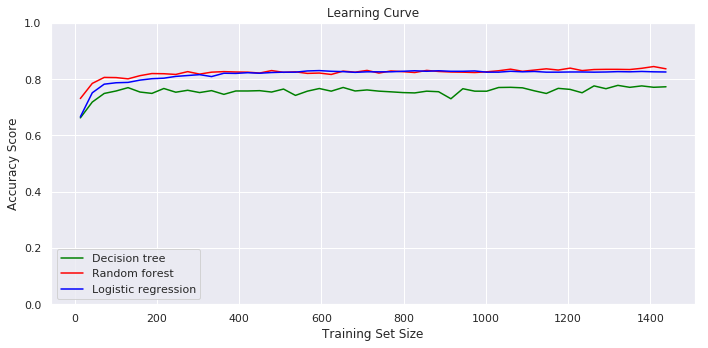

In [33]:
plot_learning_curve(dtc, rfc, lrg, X, y)

## 8.2 Confusion matrix

To evaluate the amount of mistakes made by the models, we are going to look at the confusion matrix. We use the `confusion_matrix()` function and create a table for the values. We add some names to the columns, to clarify the numbers. 

### Decision tree

In [34]:
#Displaying the confusion matrix
cm_dtc = pd.DataFrame(
    confusion_matrix(y_test, pred_dtc), 
    index=['true: bad quality', 'true: good quality'], 
    columns=['prediction: bad quality', 'prediction: good quality']
)

cm_dtc

,prediction: bad quality,prediction: good quality
true: bad quality,154,59
true: good quality,56,211


### Random forest

In [35]:
#Displaying the confusion matrix
cm_rfc = pd.DataFrame(
    confusion_matrix(y_test, pred_rfc), 
    index=['true: bad quality', 'true: good quality'], 
    columns=['prediction: bad quality', 'prediction: good quality']
)

cm_rfc

,prediction: bad quality,prediction: good quality
true: bad quality,180,33
true: good quality,39,228


### Logistic regression

In [36]:
#Displaying the confusion matrix
cm_lrg = pd.DataFrame(
    confusion_matrix(y_test, pred_lrg), 
    index=['true: bad quality', 'true: good quality'], 
    columns=['prediction: bad quality', 'prediction: good quality']
)

cm_lrg

,prediction: bad quality,prediction: good quality
true: bad quality,171,42
true: good quality,34,233


## Storing our clean data
We want to store our clean data set, so we can use it for the next module! This will ensure that we do not have to do our work twice! 

In [166]:
wine.to_csv("winequality-red_3.csv",index=False)